# メディアプログラミング入門：第2回本課題


ある銘柄の株価データが与えられると、下のようなデザインのグラフを生成するプログラムを作成してください。  

<img src="mi_exp2_target.png">

ただし、以下の条件を満たしてください。

- 2018年1月1日～2018年3月31日までのトヨタの株価データを記録したファイル'TM_20180101-20190331_stock.csv'を読み込みます。   
このファイルは、プログラムの冒頭で変数`file`に代入してから使用してください（下記のセルの1行目の通りです）。
- 2019年1月1日～2019年1月31日のデータを描画
- 日足データをそのまま描画（週足ではない）
- 4日移動平均と13日移動平均を重畳描画し、その凡例をつける
- X幅の主軸は週（毎週月曜）ごと、補助軸は日ごと
- X軸のラベルの主軸は年月日、補助軸はなし
- 出力した画像を`mi_exp2_ans.png`という名前の画像として保存
- 一つのセルにまとめて下さい（セルをいくつも並べないでください）

**本課題の評価では、`file`で指定した株価データを別の銘柄のものに変更して行います。   
同じ形式で保存された他銘柄の株価データでも同様の結果を出せるようなプログラムを作成してください。**

ヒント：

- 基本的には`TimeSeriesDataAnalysis2.ipynb`から適切な部分をコピペしればできるはずです
- ローソク足チャートの幅は`width`のパラメータで調節できます
- 完全に一致しなくても構いません
- わからなければできたところまでで出してください

このファイルに**グラフが描画された状態で保存**して、`mp_exp2.ipynb`を提出してください。

In [1]:
file = 'TM_20180101-20190331_stock.csv' # この行は変更しないでください！

# 以下にプログラムを書いてください。
# 株価データのファイルは上の行で指定した変数 file を使ってください。
# 課題の評価では、上記のfileで指定した株価データを別の銘柄に変更して行います。
# 他の株価データでも同様の結果を出せるようなプログラムを作成してください。

<IPython.core.display.Javascript object>


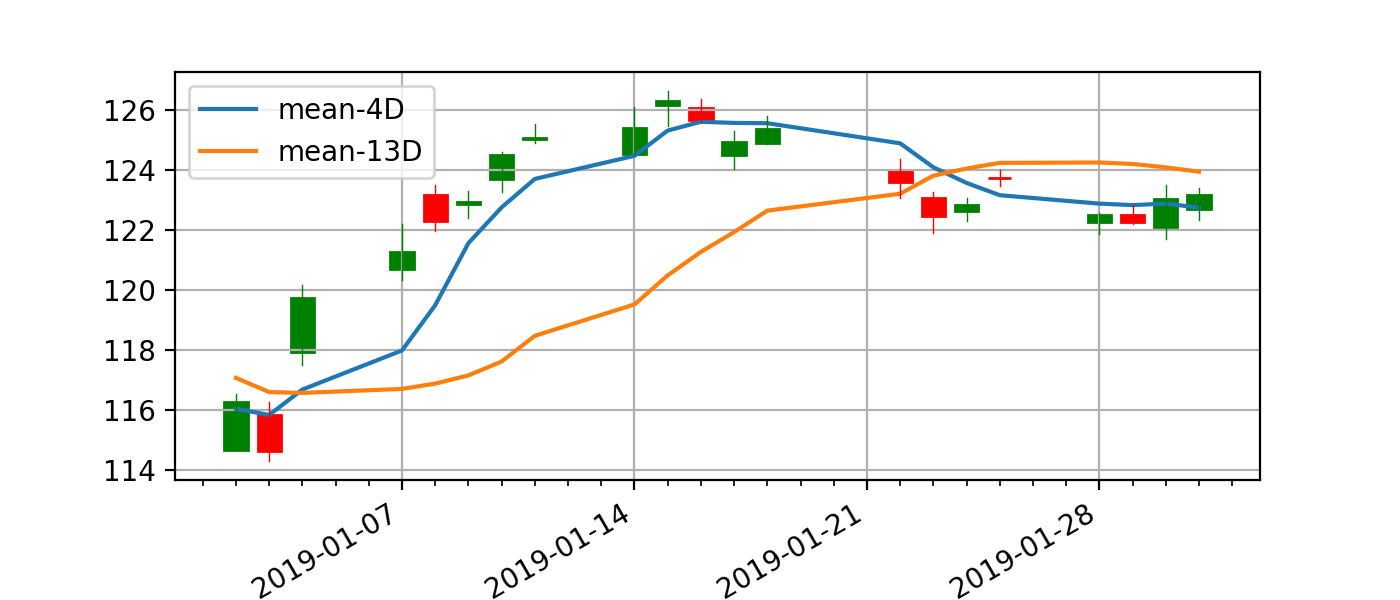

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import mpl_finance
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU # locatorをWeekdayLocatorにするなら必要

#読み込みとデータの成形
sdf = pd.read_csv(file)
sdf['date'] = pd.to_datetime(sdf['date']) # 'Date'キーの値は日付を表す文字列なので、to_datetimeを適用してdatetime64型に変換
sdf.set_index('date', inplace=True) # 次に、set_index()メソッドで'date'キーの列をインデックスに指定する。

start = datetime(2019, 1, 1) # 開始日
end = datetime(2019, 1, 31) # 終了日

ohlc = sdf.loc[start:end, ['open', 'high', 'low', 'close']] # 出来高は単位が違うので除く
ohlc.index = mdates.date2num(ohlc.index.to_pydatetime()) # indexをdatetime形式から数値に変換

data = ohlc.reset_index().values # matrixに変換


#描画
register_matplotlib_converters() # converterをリセット
fig = plt.figure(figsize=(7, 3)) # figure(図を配置する画面)のサイズを指定
ax = plt.subplot()

#移動平均
sdf['mean-4D'] = sdf.loc[:, 'close'].rolling(4).mean()
sdf['mean-13D'] = sdf.loc[:, 'close'].rolling(13).mean()
mean_labels = ['mean-4D', 'mean-13D']
ax.plot(sdf[start:end].index, sdf.loc[start:end, 'mean-4D'])
ax.plot(sdf[start:end].index, sdf.loc[start:end, 'mean-13D'])
ax.legend(mean_labels) # 凡例を描画

mpl_finance.candlestick_ohlc(ax, data, width=0.7, colorup='g', colordown='r')
ax.grid()  # グリッド表示
locator = mdates.WeekdayLocator(byweekday=(MO))  # x軸の主軸の間隔を毎週月木にする
ax.xaxis.set_major_locator(locator) # X軸の主軸の間隔を設定
ax.xaxis.set_minor_locator(mdates.DayLocator()) # X軸の補助軸の間隔を日付に設定（X軸にメモリが追加される）
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator)) # X軸の主軸のラベルをdateフォーマットにする
fig.autofmt_xdate() # X軸の日付ラベルが見やすくなるよう回転
plt.savefig('mi_exp2_ans.png') # 図を画像として保存

このような図になるはずです（上と同じ画像です）。

<img src="mi_exp2_target.png">
